<a href="https://colab.research.google.com/github/Muntasir2179/tensorflow-learning/blob/neural-network-regression/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with Neural Networks in TensorFlow

There are difinitions for a regression problem but in our case, we're going to simplify it: predicting a neumerical variable based on some other combination of variables, evem shorter...predicting a number.

In [ ]:
# Import TensorFLow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

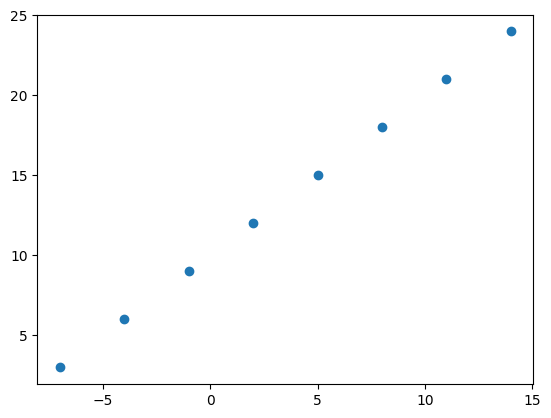

In [ ]:
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# let's create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X = np.reshape(X, (-1, 1))
X

array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])

In [ ]:
# turn our NumPy array into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creting a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [ ]:
tf.random.set_seed(42)

In [ ]:
# create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.1764 - mae: 11.1764
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 11.0439 - mae: 11.0439
Epoch 3/5
1/1 [==============================] - 0s 48ms/step - loss: 10.9114 - mae: 10.9114
Epoch 4/5
1/1 [==============================] - 0s 24ms/step - loss: 10.7789 - mae: 10.7789
Epoch 5/5
1/1 [==============================] - 0s 23ms/step - loss: 10.6464 - mae: 10.6464


## Getting prediction form the model

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 218ms/step


array([[14.311088]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increases the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling model** - Here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting the model** - Here we might fit a model for more epochs (leave ot training for longer) or on more data (give the model more examples to learn from).

### Increasing number of epochs

In [ ]:
# lets recreate the model
# Increasing the number of epochs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 710ms/step - loss: 20.5434 - mae: 20.5434
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 20.2621 - mae: 20.2621
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 19.9809 - mae: 19.9809
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 19.6996 - mae: 19.6996
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 19.4184 - mae: 19.4184
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 19.1371 - mae: 19.1371
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 18.8559 - mae: 18.8559
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 18.5746 - mae: 18.5746
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 18.2934 - mae: 18.2934
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 18.0121 - mae: 18.0121
Epoch 11/100
1/1 [==============================

In [ ]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# let's see if our model's predictino has improved
model.predict([17.0])

1/1 [==============================] - 0s 92ms/step


array([[29.509335]], dtype=float32)

### Adding more hidden units with activation function

In [ ]:
# redefining the model but this time we are adding more hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 559ms/step - loss: 13.5162 - mae: 13.5162
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 13.0578 - mae: 13.0578
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 12.5973 - mae: 12.5973
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 12.1336 - mae: 12.1336
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.6727 - mae: 11.6727
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2036 - mae: 11.2036
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.7133 - mae: 10.7133
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 10.2135 - mae: 10.2135
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 9.6966 - mae: 9.6966
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1475 - mae: 9.1475
Epoch 11/100
1/1 [==============================] - 

In [ ]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# getting prediction from the model
model.predict([20.0])

1/1 [==============================] - 0s 85ms/step


array([[37.35152]], dtype=float32)